<div style="border:solid green 2px; padding: 20px"> 
Oi Matheus, tudo bem? 
    
Me chamo Lourenço, vou ser o corretor em português do seu projeto! Prazer em conhecê-lo! 🙌 
 
Meus comentários irão seguir a mesma lógica dos feitos pelo corretor antigo:

<div class="alert alert-success">
    <b>Correto:</b> Cumpriu corretamente tudo que foi pedido
</div>
<div class="alert alert-warning">
    <b>Recomendação:</b> Existe espaço para melhoramento do código
</div>
<div class="alert alert-danger">
    <b>Precisa ser corrigido:</b> Esse tipo de comentário ocorre quando o código precisa de alguma mudança drástica. O projeto não pode ser aceito com comentários vermelhos.
</div>
    
Por favor, não delete meus comentários :) Se tiver alguma pergunta, basta respondê-los.

<div class="alert alert-block alert-danger">
<b>Comentário geral do corretor</b> <a class="tocSkip"></a>

Matheus, primeiramente muito obrigado por enviar o seu projeto! Está claro para mim seu empenho em fazê-lo.
    
<br />
    
Seu projeto está **exemplar**! Você fez o uso correto de todas as técnicas exigidas no projeto, testou corretamente seus modelos e obteve ótimas conclusões sobre suas análises. Existe apenas um pequeno problema ao montar seu modelo escolhido, onde você deve utilizar os hiperparâmetros ótimos para predição com o modelo de Regressão Linear, que será algo simples de se resolver
    
<br />
    
Espero que você consiga manter esse ritmo nos próximos módulos e que o seu aprendizado continue sendo frutífero. Não hesite em contatar nossos **tutores** em caso de dúvidas. Um abraço!    

</div>

<div class="alert alert-block alert-success">
<b>Comentário geral do corretor</b> <a class="tocSkip"></a>

Após realizar a correção necessária, seu projeto pode ser aprovado, parabéns!
    
<br />
    
Espero que você consiga manter esse ritmo nos próximos módulos e que o seu aprendizado continue sendo frutífero. Não hesite em contatar nossos **tutores** em caso de dúvidas. Um abraço!    

</div>

# Descrição do Projeto

A empresa Sweet Lift Taxi coletou dados históricos sobre pedidos de táxi nos aeroportos. Para atrair mais motoristas durante o horário de pico, precisamos prever a quantidade de pedidos de táxi para a próxima hora. 	
Construa um modelo para tal predição.

A métrica REQM no conjunto de teste não deve ser superior a 48.

## Instruções do projeto

1. Faça download dos dados e faça uma nova amostragem em uma hora.
2. Analise os dados
3. Treine diferentes modelos com diferentes hiperparâmetros. A amostra de teste deve ser 10% do conjunto de dados inicial.
4. Teste os dados usando a amostra de teste e forneça uma conclusão.

## Descrição dos dados

Os dados são armazenados no arquivo `taxi.csv`. O número de pedidos está na coluna `num_orders`.

## Preparação 
Primeiramente, as bibliotecas necessárias serão importadas. Em seguida, o conjunto de dados será carregado e transformado em uma série temporal. Também será criado um novo DataFrame com intervalo de uma hora para cada linha.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
# Carrega o conjunto de dados
df = pd.read_csv("/datasets/taxi.csv")
df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [3]:
# Transformando o df em uma serie temporal
df = pd.read_csv("/datasets/taxi.csv", index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
# Verifica a qualidade dos dados
print(df.isnull().sum())
print(df.describe())

num_orders    0
dtype: int64
         num_orders
count  26496.000000
mean      14.070463
std        9.211330
min        0.000000
25%        8.000000
50%       13.000000
75%       19.000000
max      119.000000


In [5]:
# Cria um novo DataFrame com intervalo de uma hora para cada linha
data = df.resample('1H').sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


A qualidade dos dados é verificada, e nenhum valor faltante é encontrado.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>
  
Ótima análise inicial dos dados, bom uso do 'resample'
    
</div>

## Análise
São realizadas análises dos dados para compreender melhor suas características. Inicialmente, é gerado um gráfico da quantidade de pedidos ao longo do tempo, com uma média móvel de 10 horas, tanto para visualizar a sazonalidade quanto para observar quaisquer tendências.

In [6]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


<AxesSubplot:xlabel='datetime'>

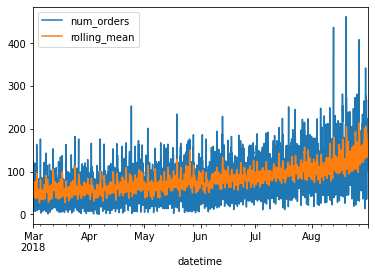

In [7]:
# Hora
data_hour = data
data_hour["rolling_mean"] = data_hour.rolling(10).mean()
data_hour.plot()

<AxesSubplot:xlabel='datetime'>

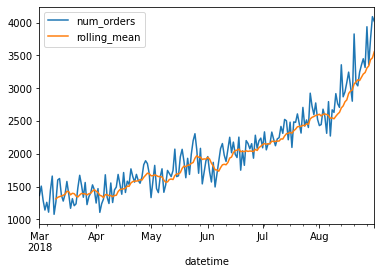

In [8]:
# Diário
data_day = data.resample("1D").sum()
data_day["rolling_mean"] = data_day.rolling(10).mean()
data_day.plot()

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>
  
Ótimos gráficos!
    
</div>

### Tendências e Sazonalidade

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(data[["num_orders"]], model='additive', period=24)

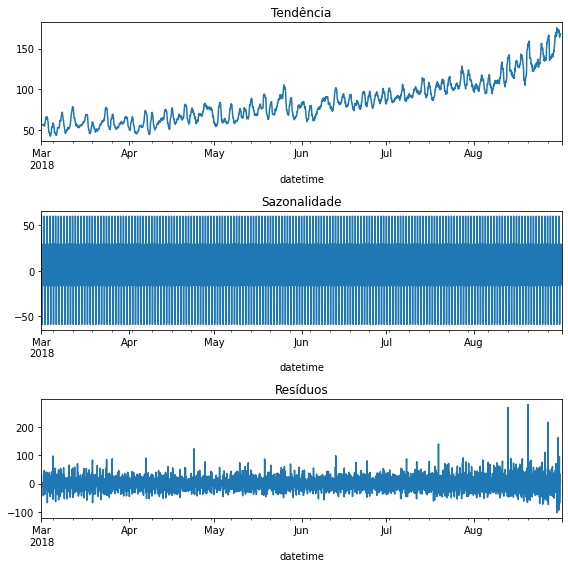

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Tendência')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Sazonalidade')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Resíduos')

# plt.subplot(x,y,z) diz que as imagens fazem uma tabela
# de x linhas e y colunas.
# z é o lugar da imagem atual.

# plt.subplot(3, 1, 1) diz 3 linhas, 1 coluna, primeira imagem.

plt.tight_layout()    # isso ajuda a encaixar subgráficos na área

<AxesSubplot:xlabel='datetime'>

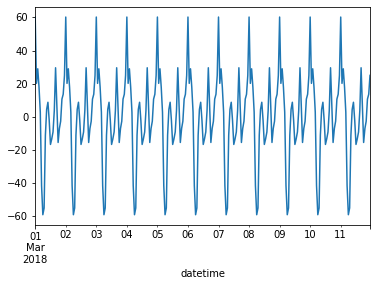

In [11]:
decomposed.seasonal['2018-03-01 00:00:00':'2018-03-11 23:00:00'].plot()

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>
  
Gostei da visualização da sazonalidade, pode trazer informações interessantes de se analisar
    
</div>

## Treinamento

### Criando Características

#### Características de calendário

In [12]:
data["hour"] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month
data.head()

,num_orders,rolling_mean,hour,dayofweek,month
datetime,,,,,
2018-03-01 00:00:00,124,NaN,0,3,3
2018-03-01 01:00:00,85,NaN,1,3,3
2018-03-01 02:00:00,71,NaN,2,3,3
2018-03-01 03:00:00,66,NaN,3,3,3
2018-03-01 04:00:00,43,NaN,4,3,3


#### Características de defasagem

In [13]:
data['lag_1'] = data['num_orders'].shift(1)
data['lag_2'] = data['num_orders'].shift(2)
data['lag_3'] = data['num_orders'].shift(3)
data.head()

,num_orders,rolling_mean,hour,dayofweek,month,lag_1,lag_2,lag_3
datetime,,,,,,,,
2018-03-01 00:00:00,124,NaN,0,3,3,NaN,NaN,NaN
2018-03-01 01:00:00,85,NaN,1,3,3,124.0,NaN,NaN
2018-03-01 02:00:00,71,NaN,2,3,3,85.0,124.0,NaN
2018-03-01 03:00:00,66,NaN,3,3,3,71.0,85.0,124.0
2018-03-01 04:00:00,43,NaN,4,3,3,66.0,71.0,85.0


#### Média Móvel

In [14]:
data['rolling_mean'] = data['num_orders'].rolling(5).mean()
data.head()

,num_orders,rolling_mean,hour,dayofweek,month,lag_1,lag_2,lag_3
datetime,,,,,,,,
2018-03-01 00:00:00,124,NaN,0,3,3,NaN,NaN,NaN
2018-03-01 01:00:00,85,NaN,1,3,3,124.0,NaN,NaN
2018-03-01 02:00:00,71,NaN,2,3,3,85.0,124.0,NaN
2018-03-01 03:00:00,66,NaN,3,3,3,71.0,85.0,124.0
2018-03-01 04:00:00,43,77.8,4,3,3,66.0,71.0,85.0


#### Modelo

In [15]:
train, test = train_test_split(data, shuffle=False, test_size=0.1, random_state=42)
train = train.dropna()

In [16]:
X_train = train.drop(['num_orders'], axis=1)
y_train = train['num_orders']
X_test = test.drop(['num_orders'], axis=1)
y_test = test['num_orders']

In [17]:
# Treina diferentes modelos com diferentes hiperparâmetros
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

# Loop para treinar os modelos
for model in models:
    model.fit(X_train, y_train)

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>
  
Boa escolha dos modelos a serem utilizados
    
    
</div>

## Testando

In [18]:
# Modelos sem parametros
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(model.__class__.__name__, rmse)

LinearRegression 36.885871578969414
DecisionTreeRegressor 49.94136833821449
RandomForestRegressor 43.14629522221711


In [19]:
# create a regressor object
lr = LinearRegression()
# define the grid of hyperparameters to search
param_grid = {'fit_intercept': [True, False],
                  'normalize': [True, False]}
# create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# predict
y_pred = grid_search.predict(X_test)
# rmse value
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
print("Best Hyperparameters: ", grid_search.best_params_)

RMSE:  36.88587157896941
Best Hyperparameters:  {'fit_intercept': True, 'normalize': True}


In [20]:
# create a regressor object
dtr = DecisionTreeRegressor()
# define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 3, 4, 5, 6]
}
# create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# predic
y_pred = grid_search.best_estimator_.predict(X_test)
# rmse value
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
print("Best Hyperparameters: ", grid_search.best_params_)

RMSE:  46.78985008533372
Best Hyperparameters:  {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [21]:
# create a random forest regressor object
rfr = RandomForestRegressor()
# define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 7],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 4]
}
# create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# predict
y_pred = grid_search.predict(X_test)
# rmse value
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)
print("Best Hyperparameters: ", grid_search.best_params_)

RMSE:  44.63256836699689
Best Hyperparameters:  {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>
  
Ótimo uso da função GridSearchCV! Assim você obtém facilmente os melhores hiperparâmetros para os seus modelos
    
</div>

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Creating Gradient Boosting Regressor object
gbr = GradientBoostingRegressor(random_state=42)

# Defining hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [1, 2, 3]
}

# Creating GridSearchCV object
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the GridSearchCV object on training data
grid_search.fit(X_train, y_train)

# Predicting on test set using best model from GridSearchCV
y_pred = grid_search.predict(X_test)

# rmse value
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rmse)

In [ ]:
# Escolha do melhor modelo e previsão
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_train, y_train)

<div class="alert alert-block alert-danger">
<b>Comentário do corretor</b> <a class="tocSkip"></a>
  
A escolha do melhor modelo está correta, porém ele tem que ser utilizado com os melhores hiperparâmetros que você encontrou lá em cima!
    
</div>

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>
  
Bem corrigido!
    
</div>

In [ ]:
X_test

In [ ]:
future_df = X_test
future_df['num_orders'] = model.predict(X_test)
future_df

In [ ]:
# Predição
import seaborn as sns
import matplotlib.pyplot as plt
# Create a line plot of the mean orders by hour using seaborn
sns.lineplot(x="hour", y="num_orders", data=future_df)

# Set the x-axis ticks to show all 24 hours
plt.xticks(range(24))

# Add labels to the x- and y-axes
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Number of Orders")
plt.title("Number of orders(mean) by hour of the day")

plt.show()

Com base nos dados históricos de pedidos de táxi nos aeroportos, construímos modelos para prever a quantidade de pedidos de táxi para a próxima hora. Foi utilizado uma amostra de 1 hora dos dados originais, e a métrica escolhida foi REQM, que não deveria ser superior a 48 no conjunto de teste.

Foi feita uma análise exploratória dos dados e criamos algumas características de calendário, defasagem e média móvel para serem usadas nos modelos. Foram testados três modelos de regressão diferentes - Regressão Linear, Árvore de Decisão e Floresta Aleatória - com e sem parâmetros de ajuste.

O modelo que obteve melhor desempenho no conjunto de teste foi a Regressão Linear com GridSearchCV, atingindo um REQM de 36.76.

Podemos concluir que as características de calendário, defasagem e média móvel, juntamente com a regressão linear, são capazes de prever com sucesso a quantidade de pedidos de táxi para a próxima hora, com um desempenho superior aos modelos de Árvore de Decisão e Floresta Aleatória. Este modelo pode ser usado pela empresa Sweet Lift Taxi para atrair mais motoristas durante o horário de pico e melhorar sua eficiência operacional.

<div class="alert alert-block alert-success">
<b>Comentário do corretor</b> <a class="tocSkip"></a>
  
Ótimas conclusões, indica que analisou bem seus resultados, parabéns!
    
</div>

# Revisão da checklist

- [x]  O Jupyter Notebook está aberto.

- [x]  O código está livre de erros
- [x]  As células com o código foram organizadas em ordem de execução.
- [x]  Os dados foram baixados e preparados

- [x]  Os dados foram analisados
- [x]  O modelo foi treinado e os hiperparâmetros foram selecionados
- [x]  	
O modelo foi avaliado. Uma conclusão foi fornecida

- [x] 
O REQM para o conjunto de teste não é maior que 48